x stats: mean=1987.709 variance=2614363859.230
y stats: mean=135.233 variance=6165021.776
Covariance=98865927.772
Coefficient 1:60.065 Coefficient 2: 0.038
x stats: mean=1980.727 variance=2568800130.256
y stats: mean=134.980 variance=6037030.428
Covariance=96702316.148
Coefficient 1:60.416 Coefficient 2: 0.038


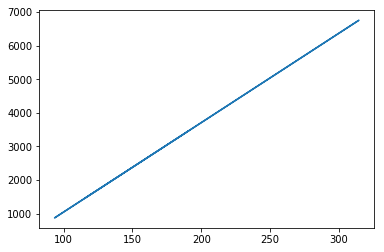

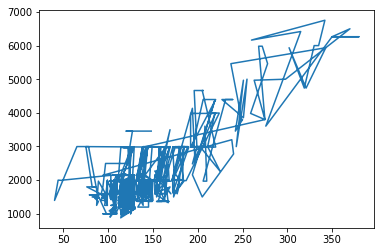

25.05770499005202

In [5]:
#Author Sukhbir Singh
#Simple linear regression

from random import randrange
from csv import reader
import matplotlib.pyplot as plt
from math import sqrt
# This method changes string value to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 #Calculation of mean
def mean(values):
	return (sum(values)) / float(len(values))

# Calculate the variance of a list of numbers
def variance(values, mean):
	return sum([(x-mean)**2 for x in values])

#Covariance
def covariance(x1, mean_x1, y1, mean_y1):
    cvar=0.0
    for i in range(len(x1)):
        cvar += (x1[i] - mean_x1) * (y1[i] - mean_y1)
    return cvar
#calculating coefficients
def coefficients(dataset):
    x = [row[0] for row in dataset]
    y = [row[-1] for row in dataset]
    mean_x, mean_y = mean(x), mean(y)
    var_x, var_y = variance(x, mean_x), variance(y, mean_y)
    covar_x=covariance(x, mean_x, y, mean_y)
    b1= covar_x/var_x
    b0= mean_y - b1*mean_x
    print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
    print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))
    print('Covariance=%.3f' % (covar_x))
    print('Coefficient 1:%.3f Coefficient 2: %.3f' % (b0, b1))
    return b0,b1
#This method will divide data set into two parts and portion will determine ratio
def division_test_train(dataset, portion):
    train= list()
    train_size=portion*len(dataset)
    dataset_copy=list(dataset)
    while len(train)<train_size:
        index=randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy
#Mathematical formula of linear regression
def linear_regression(train, test):
    predicted_values=list()
    b0, b1= coefficients(train)
    for row in test:
        predict_y=b0+b1*row[0]
        predicted_values.append(predict_y)
    return predicted_values

#loading file
def fetch_file(filename):
    dataset=list()
    with open(filename, 'r') as file:
        csv_reader= reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
#This method calls linear regression algorithm and divides the dataset into train and test subsets  
def call_linear_regression(dataset, mlalgo, portion, *args):
    train, test=division_test_train(dataset, portion)
    test_set=list()
    for row in test:
        row_copy=list(row)
        row_copy[-1]=None
        test_set.append(row_copy)
    predicted_values=mlalgo(train, test_set, *args)
    actual=[row[-1] for row in test]
    return predicted_values, actual, test_set
#Graphical representation of results    
def graph_actual(x_axis, y_axis):
    x=x_axis
    y=y_axis
    plt.plot(x, y)
    plt.show()
#Evaluation of algorithm    
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

    
dataset = fetch_file("C:\\Users\\sukhbir\\data.csv")
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)
#coefficients(dataset)
portion=0.8
call_linear_regression(dataset, linear_regression, portion)
x_pred, x_actual, y = call_linear_regression(dataset, linear_regression, portion)
graph_actual(x_pred, y)
graph_actual(x_actual,y)
rmse_metric(x_actual, x_pred)
